In [ ]:
import pandas as pd
import numpy
import datetime
from matplotlib.pyplot import plot

In [123]:
data=pd.read_csv('games.csv')

In [124]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Можем заметить ,что данные собирались качественно и почти отсутствуют пропуски , что дает нам меньше работы с data enginneering .  мы можем более успешно проанализировать и выявить зависимости .

Часть 2

In [126]:
a={}
for i in list(data.columns):
    a[i]=i.lower()
data.rename(columns=a,inplace=True)

Привели данные к нижнему регистру .

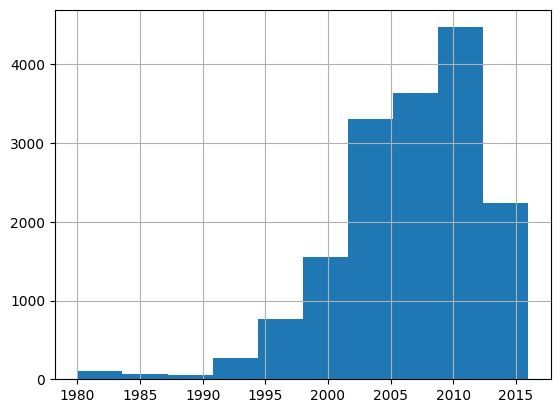

In [127]:
data['year_of_release'].hist()
data['year_of_release'].describe()
data['year_of_release']=data['year_of_release'].fillna(data['year_of_release'].mean())

Заполнили пропуски в году релиза , средними , исходя из графика  можно сказать , что большинство игр было выпущено в 2010 году . Среднее значение года выпуска состовляет 2006 год , Так-же заметем значительный спад выпуска игр в 2015 году . Выбросов нет.

In [128]:
data['year_of_release']=data['year_of_release'].astype('int')

Привели формат года релиза к типу int . Нам будет удобно работать с ним , также так-как у нас дата релиза это только год , то лучше оставить в int  и не переводить в datetime для того чтоб , не ограничивать себя в методах работы с этим столбцом .

In [129]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [130]:
median_table = data.groupby('genre')['critic_score'].transform('median')

In [131]:
median_table

0        75.0
1        69.0
2        69.0
3        75.0
4        74.0
         ... 
16710    68.0
16711    75.0
16712    66.0
16713    69.0
16714    70.0
Name: critic_score, Length: 16715, dtype: float64

In [132]:
data['critic_score'].fillna(median_table,inplace=True)

Заполнили медианным значением в зависимости от жанра пропуски в столбце critic_score. Переведем его в тип int.


In [133]:
def f(x):
    try :
        return((int(float(str(x)))))
    except:
        pass

In [134]:
data['user_score']=data['user_score'].apply(f)

In [135]:
data['user_score'].fillna(data.groupby('genre')['user_score'].transform('median'),inplace=True)

Преобразовали столбец user_score  в тип float.  и заполнили пропуски медианным значением в зависимости от genre игры.

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


<AxesSubplot:>

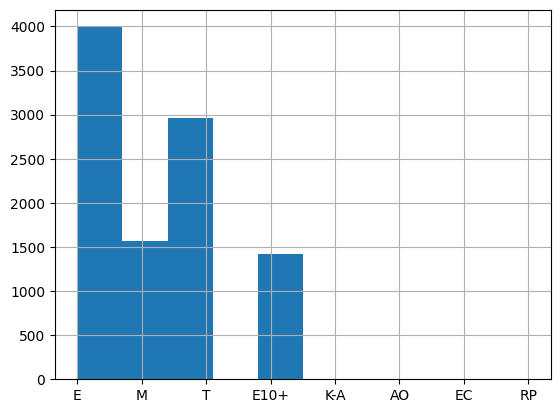

In [137]:
data.rating.hist()

Изучаем данные о рейтингах игры . Видим, что медианным значением является класс E . Поэтому заполним все проспуски классом E. Также можем заметить , что еще преобладает класс T . Выбросов нет .

In [138]:
data.rating=data.rating.fillna('E')

In [139]:
data=data.dropna()

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


Мы заполнили все пропуски , удалили 2 игры без названия , без рейтинга пользователей и без рейтинга от компаний они были выбросами в наших данных . Преобразовали тип данных в столбцах с score и к типу float и в столбцах год релиза к типу int. Для дальнейшего комфорта работы с данными.

In [141]:
data['all_region']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [143]:
data['all_region']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: all_region, Length: 16713, dtype: float64

Создали столбец all_region с суммарным кол-вом продаж во всех регионах .

3-я Часть

<AxesSubplot:>

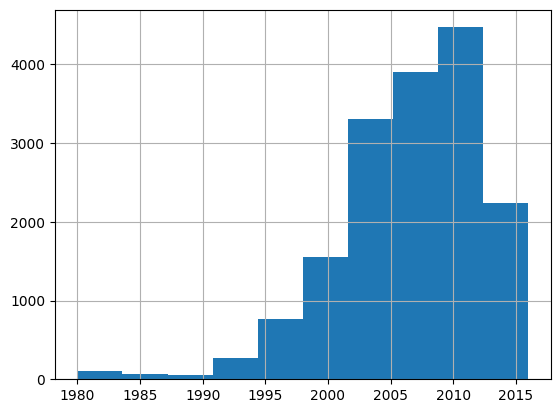

In [147]:
data['year_of_release'].hist()

Снова обращаемся к гистограмме года выпуска игр . Скорее нам не важны данные с 1980 года по 2000.Ведь эти игры менее актуальны в настоящий момент.Можно заметить рост с 1990 года по 2000 примерно в два раза , с 2000 по 2005 уже раза в 2.5. И далее виден малый рост по 2010 год , дальше с 2012 года по 2016 год спад примерно в 2 раза . Что говорит о том , что игры начали быть менее востребованными либо это просто временные затруднения .

<AxesSubplot:>

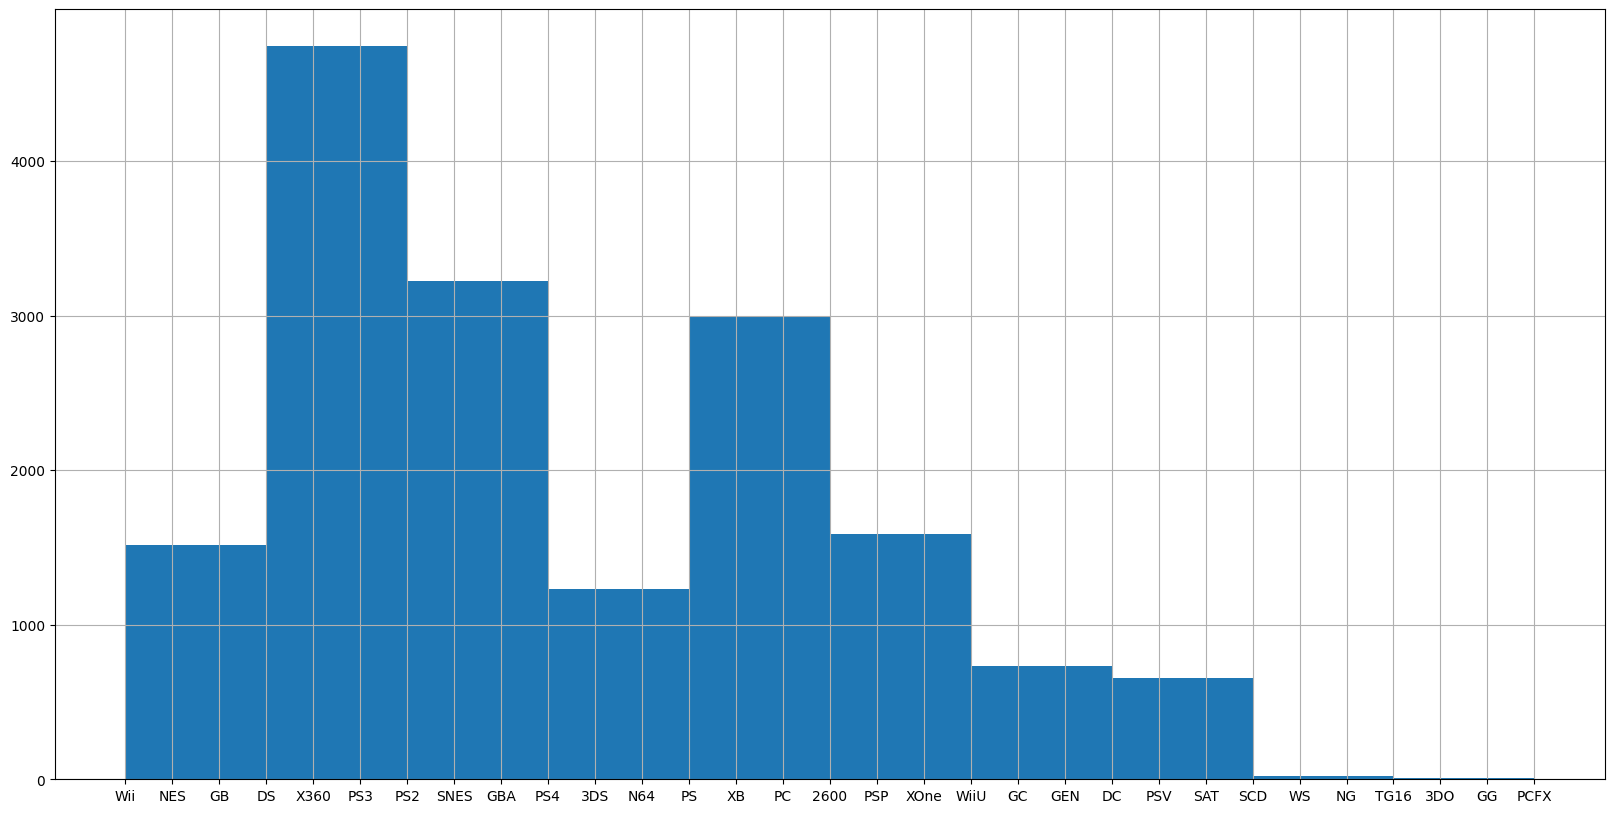

In [151]:
data.platform.hist(figsize=(20,10))

Судя по графику  наиболее популярной платформой для игр было PS3 и X360, а также DS. кол-во игр для них превышает 4500. Есть очень не-популярные платформы по типу SCD,WS,NG.TG16.3DO.GG,PCFX. Кол-во копий для них не превышает 100 экземпляров , также среднячками в данной гистограмме по кол-ву копий стали XB,PC,PS,PS2,SNES,GBA.Кол-во копий для этих платформ составляли порядка 3000.

<AxesSubplot:xlabel='platform'>

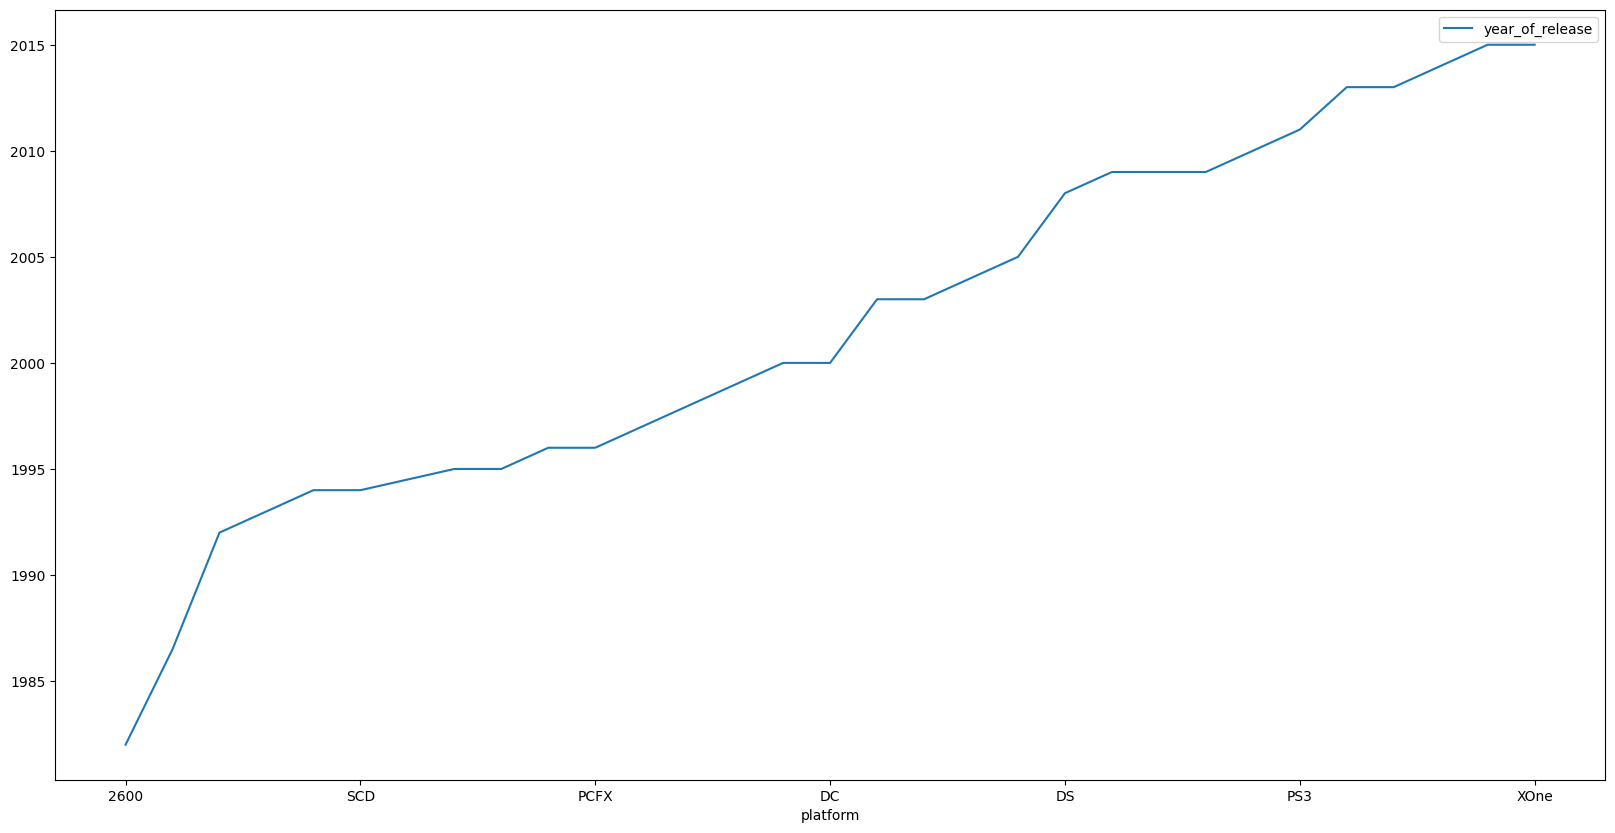

In [164]:
data[['platform','year_of_release']].groupby('platform').median().sort_values('year_of_release').plot(figsize=(20,10))

На данном графике и таблице мы видим популярность той или иной платформы в зависимости от года релиза игр . Видим , что Xone появилась в 2015 и стала востребованы игры в этом году . Видим самую первую консоль под названием 2600 еще в 1986 году .

Возьмем данные за последние 5 лет.

In [246]:
data_ex=data[['platform','year_of_release','all_region']].query('year_of_release>2011').groupby(['platform','year_of_release'],as_index=False).sum()
a=list(data[['platform','year_of_release','all_region']].query('year_of_release>2011').platform.unique())

Таблица с группировкой по платформе и году релиза . Удалим из нее5-6 строчку, так как платформа DS после 2013 перестала выпускать игры.

PS3


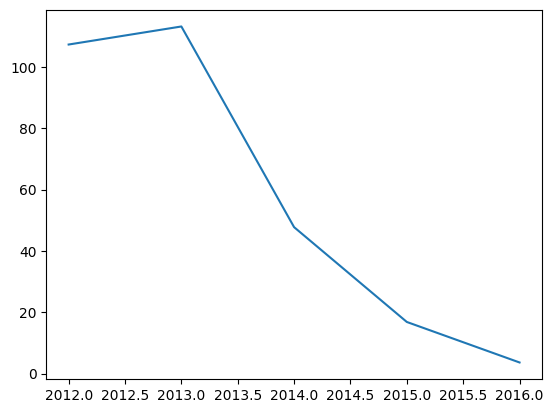

X360


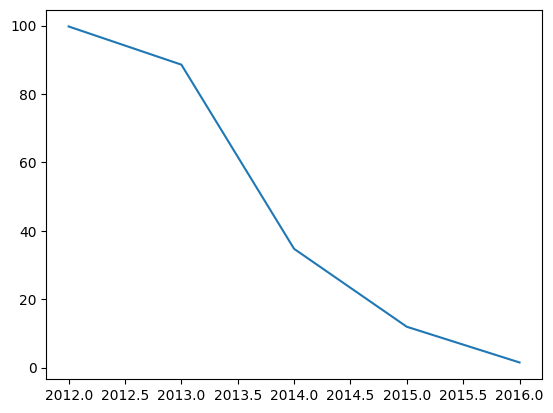

PS4


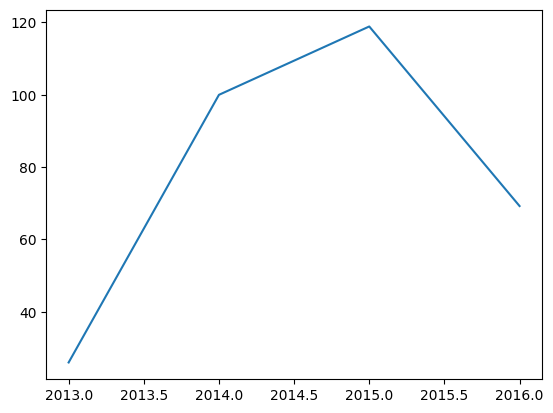

3DS


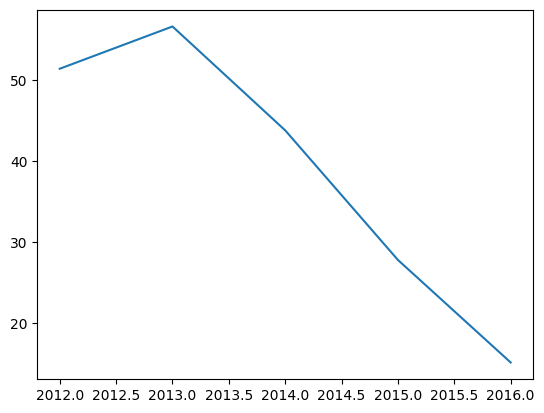

DS


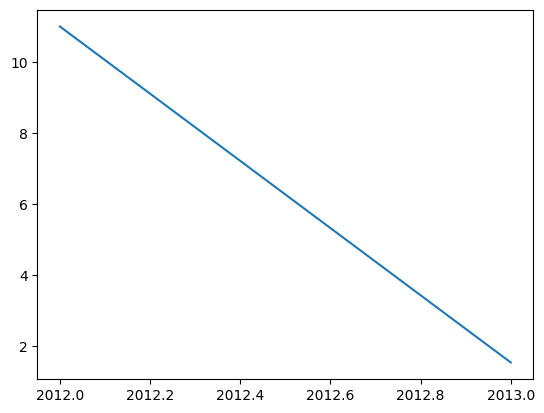

XOne


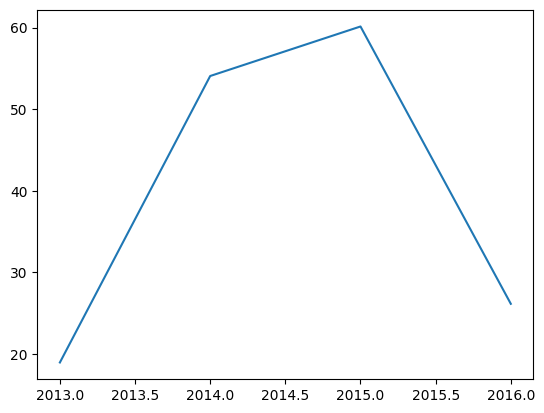

WiiU


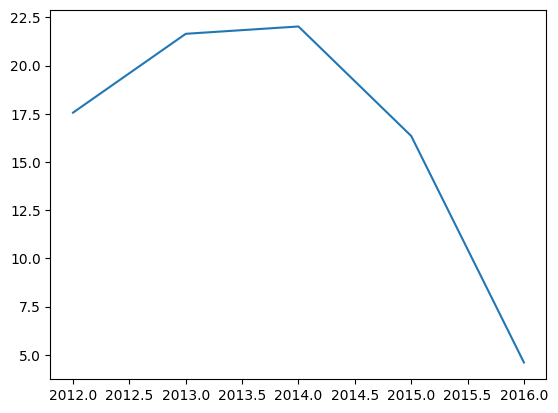

Wii


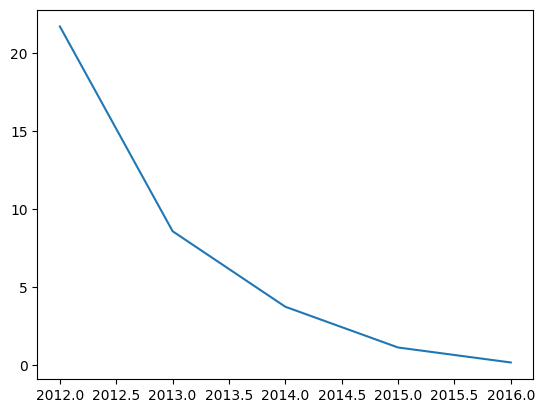

PC


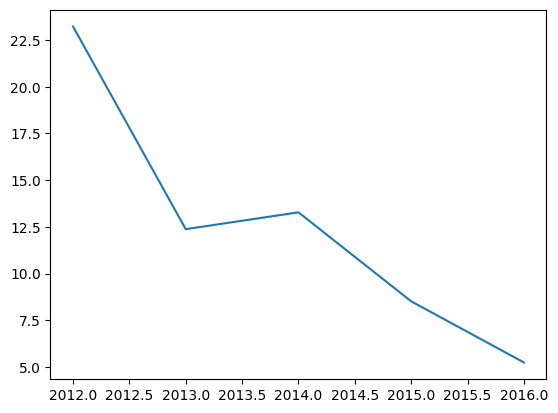

PSV


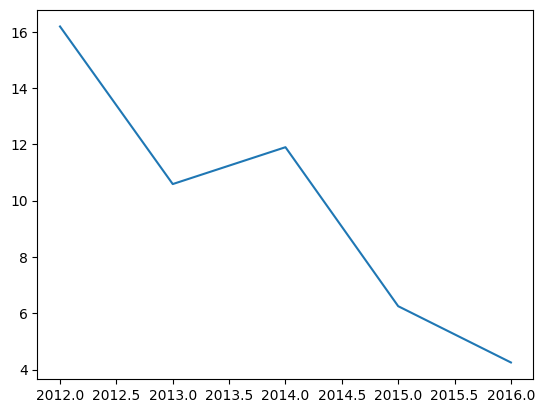

PSP


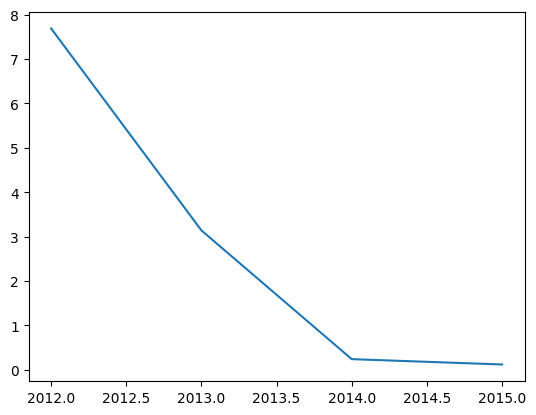

In [256]:
from matplotlib import pyplot as plt

for i in a:
    plt.plot(data_ex.query('platform==@i')[['year_of_release']],data_ex.query('platform==@i')[['all_region']])
    print(i)
    plt.show()

Построили графики по последним 5 года для каждой консоли . Можно заметить , что PSP,PSV,PC,Wii,WiiU,X360,Ps3,DS. иду значительно на спад . Для того-чтоб получить хорошую прибыль будет расcматривать только те графики , у которых объем продаж за 2015 год >=10. А именно Xone , 3DS, PS4.

XOne


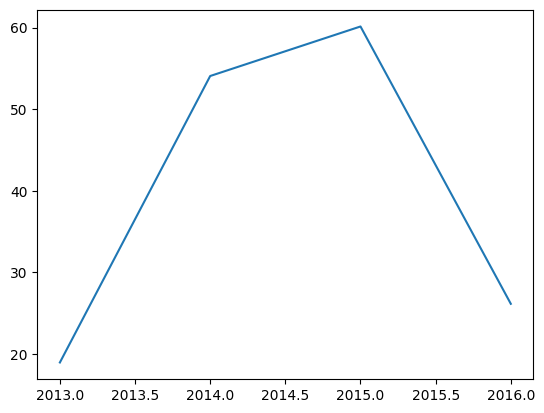

3DS


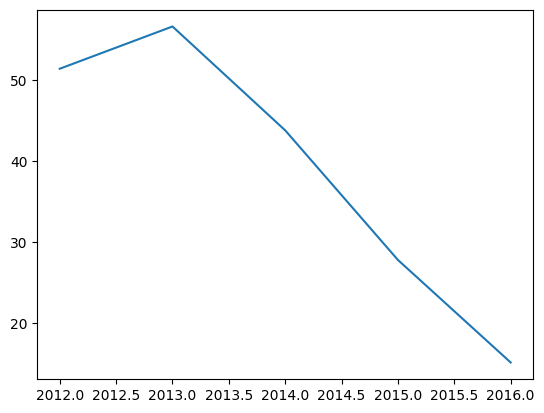

PS4


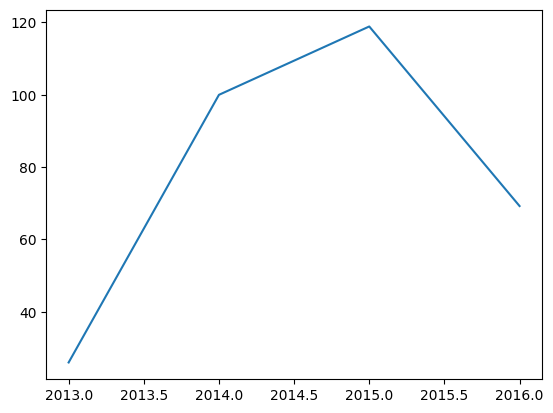

In [257]:
for i in ['XOne','3DS','PS4']:
    plt.plot(data_ex.query('platform==@i')[['year_of_release']],data_ex.query('platform==@i')[['all_region']])
    print(i)
    plt.show()

Мы видим плавный спад 3DS поэтому если мы хотим заработать , то приобретать эти игры можно только в малом кол-ве так как они особенно не популярны . Для графиков PS4 и Xone  наоборот видем значительный подъем до 2015 года и спад в 2016 году . Поэтому игры данных категорий нас интересуют больше всего.
Но так как объем продаж PS4 примерно в три раза больше обьема продаж XOne , то в основном следует сконцентрироваться именно на этой категории

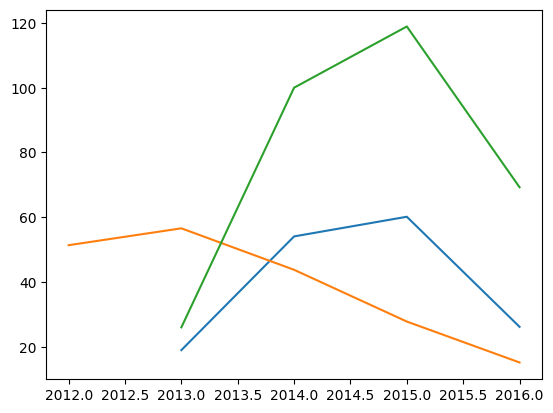

In [258]:
for i in ['XOne','3DS','PS4']:
    plt.plot(data_ex.query('platform==@i')[['year_of_release']],data_ex.query('platform==@i')[['all_region']])

Для наглядности общий график этих трех категорий , где Зеленным отмечена PS4 , синим Xone, а оранжевым 3DS.

TypeError: 'list' object is not callable

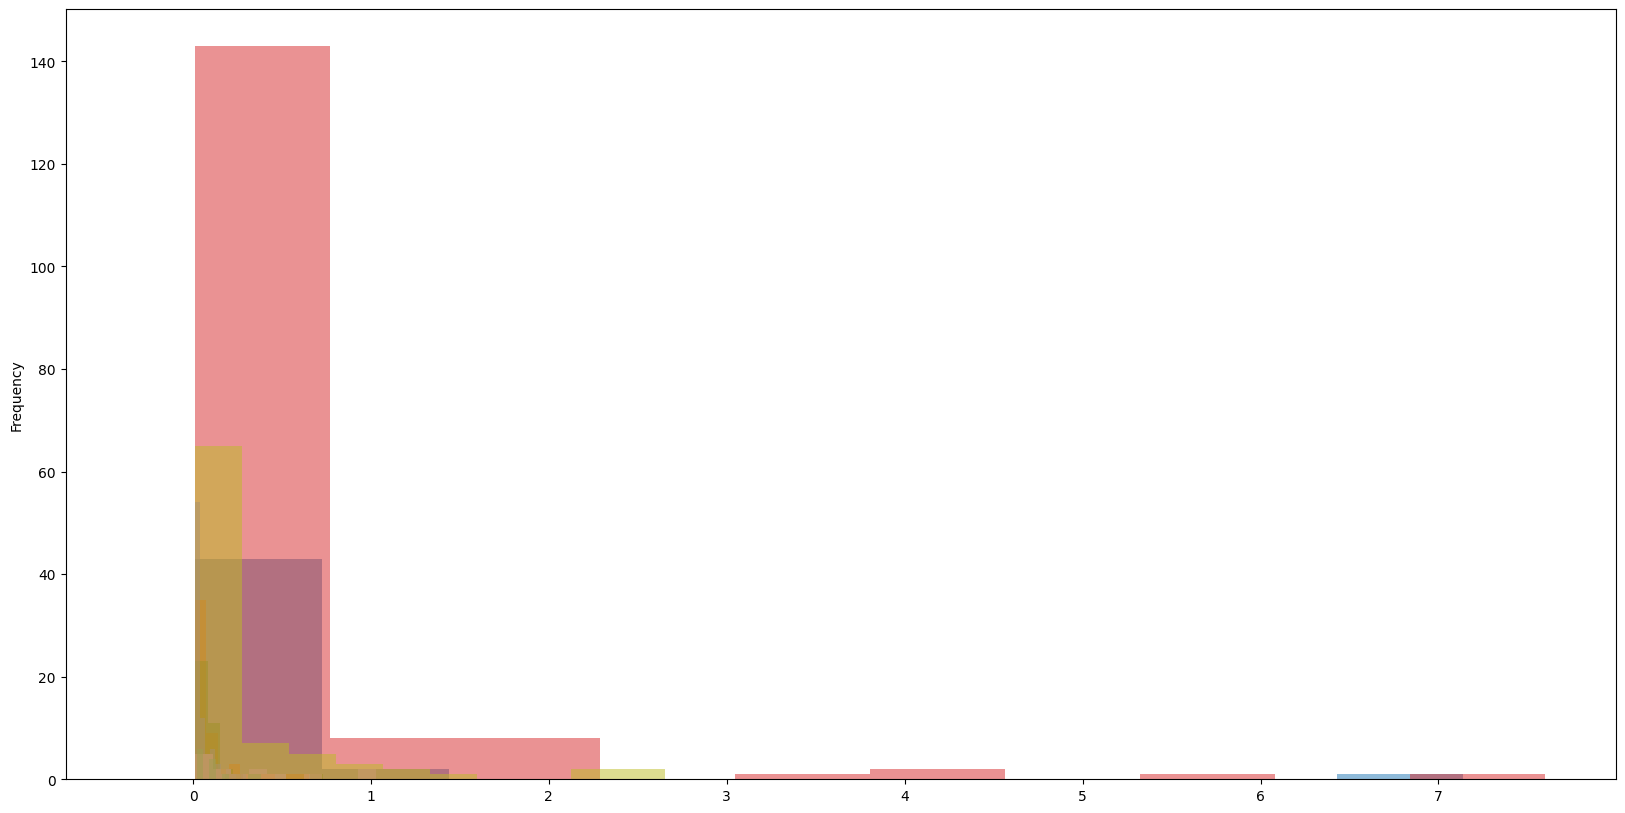

In [268]:
data.query('year_of_release==2016').groupby('platform')['all_region'].plot(kind='hist', alpha=0.5,figsize=(20,10))
plt.legend(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'])
plt.xlabel('кол-во продаж одного экземпляра')
plt.ylabel('Количество-во экземпляров')
plt.show()

Мы выбрали alpha=0.05 для примера . Будем рассматривать варианты с 5% вероятностью.


Подводя итоги 3-ье части . Мы построили гистогрыммы и обычные линейные графики для всех видов консолей за 5 лет , и отдельно за год . Проанализировав их мы выявили явных претендентов для закупки , самы популярные консоли на момент 2016 года Такими оказались :3DS,Ps4:xOne. Увидели график  популярности каждой из консоли  и общего кол-ва продаж.

4-я часть

In [281]:
data[['jp_sales','genre']].groupby('genre').sum().sort_values('jp_sales',ascending=False).head(5)

,jp_sales
genre,
Role-Playing,355.41
Action,161.43
Sports,135.54
Platform,130.83
Misc,108.11


In [280]:
data[['eu_sales','genre']].groupby('genre').sum().sort_values('eu_sales',ascending=False).head(5)

,eu_sales
genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74


In [278]:
data[['na_sales','genre']].groupby('genre').sum().sort_values('na_sales',ascending=False).head(5)

,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27


Построили 3 таблицы самых продаваемых жанров для каждого из региона по кол-во проданных копий игр .Можно заметить , что контингент na и eu. Довольно схожи первую строчку занимает Action, вторую Sports, третью Sports, пятую Misc. Единственное отличие это присутствие Platform игр в na регионе соответсвенную позиции в eu регионе занял Racing. Так-же можно заметить , что суммарное кол-во продаж в na больше порядка в 2 раза чем в регионе eu, и больше порядка в 3 раза чем в регионе jp. В свою очередь в японии преобладает продажи ролевых игр и они опереживают каждый вид порядка в 3 и более раза .В остальном набор схож eu регионом , все те же Misc,Action,Sports,Platform . только уже отсутсвует четкая разница в продажах между ними . Но в основном если мы хотим работать в na регионе то мы должны сконцетрироваться на таких жанрах как Action.Sports,Shooter.

In [289]:
data_jp=data[['jp_sales','genre','all_region']].groupby('genre').sum()
data_jp['otnos']=data_jp['jp_sales']/data_jp['all_region']
data_jp.sort_values('otnos',ascending=False).head(5)


,jp_sales,all_region,otnos
genre,,,
Role-Playing,355.41,934.56,0.380297
Strategy,49.66,174.23,0.285026
Puzzle,57.31,242.57,0.236262
Adventure,52.30,237.59,0.220127
Fighting,87.48,447.53,0.195473


Более японским жанром так сказать , стали игры по типу Fighting,Role-Playing,Role-Playing,Role-Playing,Role-Playing . Доля продаж именно этих категорий более 20% от всех продаж стала Япония , а абсолютной категорией в этом плане стали Role-Playing игры , процент , которых близится к 40% продаж именно в Японии . так-же можем заметить , что в Японии люди покупают в достаточном кол-ве игры по типу Puzzle, Adventure,Fighting. Но в большинстве это связанно с общим кол-вом малых продаж именно этих категорий из-за этого их процент высок , когда кол-во продаж самих не слишком высоко.

In [292]:
data_eu=data[['eu_sales','genre','all_region']].groupby('genre').sum()
data_eu['otnos']=data_eu['eu_sales']/data_jp['all_region']
data_eu.sort_values('otnos',ascending=False).head(5)

,eu_sales,all_region,otnos
genre,,,
Racing,236.51,728.67,0.324578
Shooter,317.34,1052.45,0.301525
Action,519.13,1744.17,0.297637
Simulation,113.52,389.97,0.291099
Sports,376.79,1331.27,0.283030


Коментарий:

In [293]:
data_na=data[['na_sales','genre','all_region']].groupby('genre').sum()
data_na['otnos']=data_na['na_sales']/data_jp['all_region']
data_na.sort_values('otnos',ascending=False).head(5)

,na_sales,all_region,otnos
genre,,,
Shooter,592.24,1052.45,0.562725
Platform,445.50,827.77,0.538193
Sports,684.43,1331.27,0.514118
Misc,407.27,802.51,0.507495
Puzzle,122.87,242.57,0.506534


Коментарий:


In [320]:
data[['rating','eu_sales','jp_sales','na_sales']].groupby('rating').mean()

,eu_sales,jp_sales,na_sales
rating,,,
AO,0.610000,0.000000,1.260000
E,0.123075,0.096712,0.235603
E10+,0.132761,0.028310,0.248817
EC,0.013750,0.000000,0.191250
K-A,0.090000,0.486667,0.853333
M,0.309642,0.041100,0.478874
RP,0.026667,0.000000,0.000000
T,0.144218,0.051131,0.256586


Коментарий:

5-я Часть

In [298]:
data['all_rating']=data.user_score+data.critic_score

Создали столбец полного рейтинга конкретных игр .

In [300]:
from scipy import stats as st

H_0: Среднему пользовательскому рейтингу  Xbox One == Среднему пользовательскому рейтингу PC
H_a: Среднему пользовательскому рейтингу  Xbox One != Среднему пользовательскому рейтингу PC
alpha = 0.05

In [316]:
results = st.ttest_ind(
    data.query('platform=="PC"')['user_score'],
    data.query('platform=="XOne"')['user_score'],equal_var=True)
alpha=0.05
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.0004250547677623625
Отвергаем нулевую гипотезу


H_0: Средний пользовательский рейтинг  жанра Sports !=  Средний пользовательский рейтинг  жанра Action
H_a: Средний пользовательский рейтинг  жанра Sports ==  Средний пользовательский рейтинг  жанра Action
alpha = 0.05

Коментарий :

In [319]:
results = st.ttest_ind(
    data.query('genre=="Sports"')['user_score'],
    data.query('genre=="Action"')['user_score'],equal_var=False)
alpha=0.05
print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.40047410979988207
Не получилось отвергнуть нулевую гипотезу


Коментарий :

Общий вывод :